In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from pytz import timezone
import matplotlib.dates as mdates
import hydroeval as he
from matplotlib import pyplot as plt, dates

In [2]:
def plot_roc_curve(df):
    KF_roc_fpr=df['KF_roc_fpr'].dropna()
    KF_roc_tpr=df['KF_roc_tpr'].dropna()
    RRCF_roc_fpr=df['RRCF_roc_fpr'].dropna()
    RRCF_roc_tpr=df['RRCF_roc_tpr'].dropna()
    KNN_roc_fpr=df['KNN_roc_fpr'].dropna()
    KNN_roc_tpr=df['KNN_roc_tpr'].dropna()
    Z_roc_fpr=df['Z_roc_fpr'].dropna()
    Z_roc_tpr=df['Z_roc_tpr'].dropna()
    SVM_roc_fpr=df['SVM_roc_fpr'].dropna()
    SVM_roc_tpr=df['SVM_roc_tpr'].dropna()
    SRD_roc_fpr=df['SRD_roc_fpr'].dropna()
    SRD_roc_tpr=df['SRD_roc_tpr'].dropna()
    auc_values=df['auc_values'].dropna()
    KF_auc, RRCF_auc, KNN_auc, Z_auc, SVM_auc, SRD_auc=auc_values[0],auc_values[1],auc_values[2],auc_values[3],auc_values[4],auc_values[5]


    plt.rcParams.update({'font.size': 14})
    plt.figure( figsize=(6, 5.8))
    plt.style.use('seaborn-v0_8-white')
    # ROC Curve plot
    plt.plot(KF_roc_fpr, KF_roc_tpr, color='red', label='EKF (AUC = %0.2f)' % KF_auc)
    plt.plot(RRCF_roc_fpr, RRCF_roc_tpr, color='#069AF3',label='RRCF (AUC = %0.2f)' % RRCF_auc)
    plt.plot(KNN_roc_fpr, KNN_roc_tpr,color='#FF7500', label='KNN (AUC = %0.2f)' % KNN_auc)
    plt.plot(Z_roc_fpr, Z_roc_tpr, color='#15B01A',label='Zscore (AUC = %0.2f)' % Z_auc)
    plt.plot(SVM_roc_fpr, SVM_roc_tpr, color='#C79FEF', label='OneclassSVM (AUC = %0.2f)' % SVM_auc)
    plt.plot(SRD_roc_fpr, SRD_roc_tpr, color='#A9561E', label='SRD (AUC = %0.2f)' % SRD_auc)

    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
   
    plt.ylim(-0.02, 1.03)
    plt.xlim(-0.02, 1.03)
    plt.plot([0, 1.01], [0, 1.01], linestyle='--', c='k', zorder=-1, alpha=0.5)
    plt.legend(fontsize=8.5, loc='lower right')


# ROC Curve


## Sensor 2

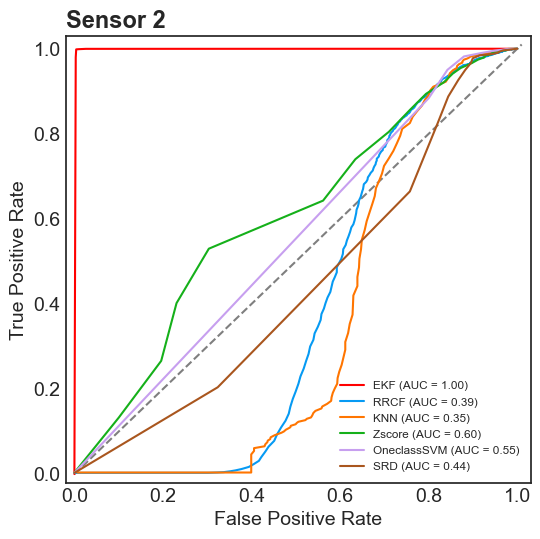

In [3]:
# Specify the file name
file_name = '../data/result/digital_twin_model_result/roc_data_sensor2.csv'

# Read data from CSV file into a DataFrame
df = pd.read_csv(file_name)


plot_roc_curve(df)
plt.title('Sensor 2', fontsize=17, loc='left', fontweight='bold')
plt.show()

## Sensor 4

In [4]:
# Specify the file name
file_name = '../data/result/digital_twin_model_result/roc_data_sensor4.csv'

# Read data from CSV file into a DataFrame
df = pd.read_csv(file_name)


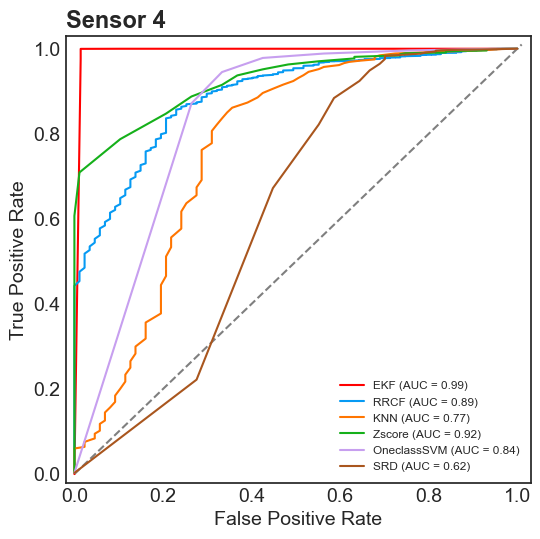

In [5]:


plot_roc_curve(df)
plt.title('Sensor 4', fontsize=17, loc='left', fontweight='bold')
plt.show()

## Sensor 1

In [6]:
# Specify the file name
file_name = '../data/result/digital_twin_model_result/roc_data_sensor1.csv'

# Read data from CSV file into a DataFrame
df = pd.read_csv(file_name)


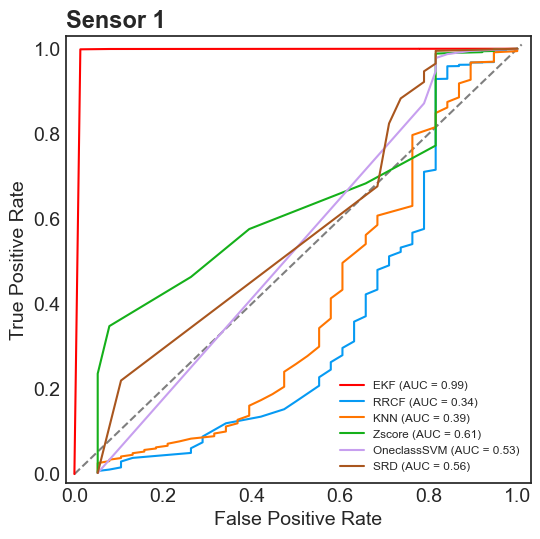

In [7]:


plot_roc_curve(df)
plt.title('Sensor 1', fontsize=17, loc='left', fontweight='bold')
plt.show()

# Simulation: Anomaly Detection 

## Sensor 1

In [8]:


# Load model data
model_result_kf = pd.read_csv('../result/digital_twin_model_result/h_j_kf_h1_gauge.csv', index_col=[0], converters={'0': pd.to_datetime})

# Upload Sensorbridge_2 data
Sensor = pd.read_csv('../data/sensor_measurements/Sensor1_classification.csv', index_col=0)
Sensor.index = pd.to_datetime(Sensor.index)


In [9]:

model_result_kf.index = pd.to_datetime(model_result_kf.index)

# Resample and interpolate simulation data
model_result_kf_resample = model_result_kf.resample('5min').mean().interpolate(method='nearest')


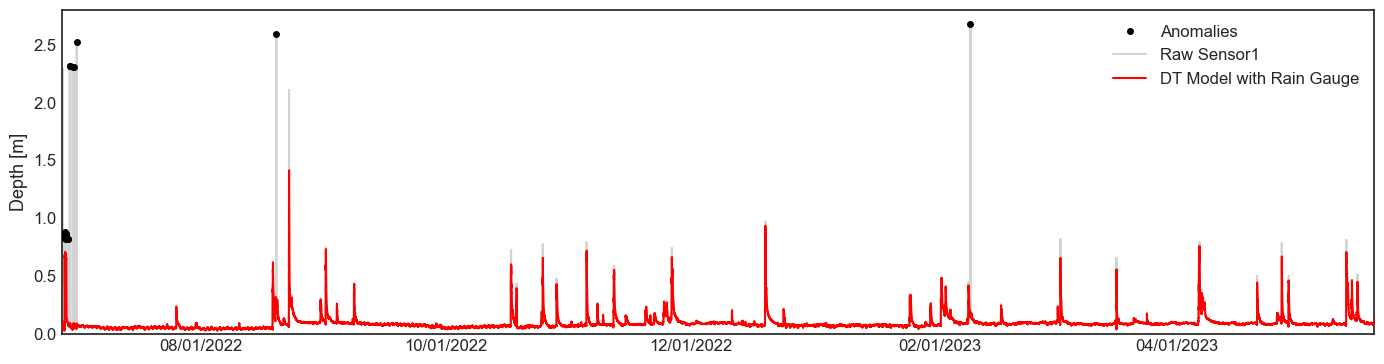

In [10]:

plt.rcParams.update({'font.size': 12})
start = datetime(2022, 6, 27, tzinfo=timezone('US/Central'))
end = datetime(2023, 5, 20, tzinfo=timezone('US/Central'))
plt.figure(figsize=(14, 3.8))
ax = plt.gca()
ax.set_xlim(start, end)
ax.set_ylim(0, 2.8)

ax.plot(Sensor[Sensor['class']==False]['Sensor1'],c='k', linestyle='None', zorder=4,marker='.', markersize=8, label='Anomalies')
ax.plot(Sensor['Sensor1'],c='lightgray',label='Raw Sensor1')
ax.plot(model_result_kf, 'r', label='DT Model with Rain Gauge', zorder=4)


ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))

ax.legend(fontsize=12)
ax.set_ylabel('Depth [m]', fontsize=13)
#ax.set_title('(c) Noise detection with kalman filter', fontsize=10, loc='left')
plt.tight_layout()
plt.show()

## Sensor 2

In [11]:
# Upload Sensor data
Sensor = pd.read_csv('../data/sensor_measurements/Sensor2_classification.csv', index_col=0)
Sensor.index = pd.to_datetime(Sensor.index)

# Load model forecast data
model_result_kf = pd.read_csv('../result/digital_twin_model_result/h_j_kf_h2_gauge.csv', index_col=[0], converters={'0': pd.to_datetime})


In [12]:

# Convert index to DatetimeIndex

model_result_kf.index = pd.to_datetime(model_result_kf.index)

# Resample and interpolate simulation data
model_result_kf_resample = model_result_kf.resample('5min').mean().interpolate(method='nearest')


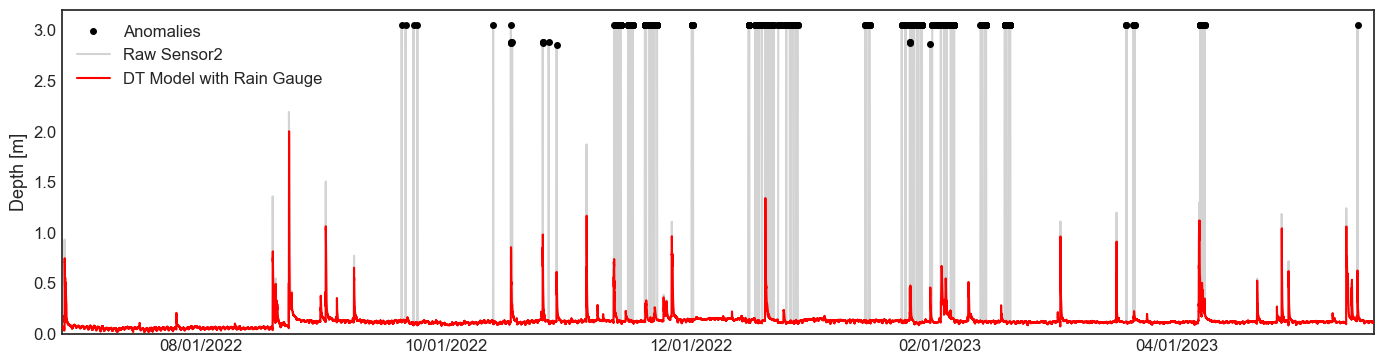

In [13]:

plt.rcParams.update({'font.size': 12})
start = datetime(2022, 6, 27, tzinfo=timezone('US/Central'))
end = datetime(2023, 5, 20, tzinfo=timezone('US/Central'))

plt.figure(figsize=(14, 3.8))
ax = plt.gca()
ax.set_xlim(start, end)
ax.set_ylim(0, 3.2)
#ax.set_ylim(0, 4.6)
ax.plot(Sensor[Sensor['class']==False]['Sensor2'],c='k', linestyle='None', zorder=4, marker='.', markersize=8, label='Anomalies')
ax.plot(Sensor['Sensor2'],c='lightgray',label='Raw Sensor2')
ax.plot(model_result_kf, 'r', label='DT Model with Rain Gauge', zorder=4)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))

ax.legend(fontsize=12)
ax.set_ylabel('Depth [m]', fontsize=13)
#ax.set_title('(c) Noise detection with kalman filter', fontsize=10, loc='left')
plt.tight_layout()
plt.show()

## Sensor 4

In [14]:
# Upload Sensor data
Sensor = pd.read_csv('../data/sensor_measurements/Sensor4_classification.csv', index_col=0)
Sensor.index = pd.to_datetime(Sensor.index)

model_result_kf = pd.read_csv('../result/digital_twin_model_result/h_j_kf_h4_gauge.csv', index_col=[0], converters={'0': pd.to_datetime})


In [15]:

model_result_kf.index = pd.to_datetime(model_result_kf.index)

# Resample and interpolate simulation data
model_result_kf_resample = model_result_kf.resample('5min').mean().interpolate(method='nearest')


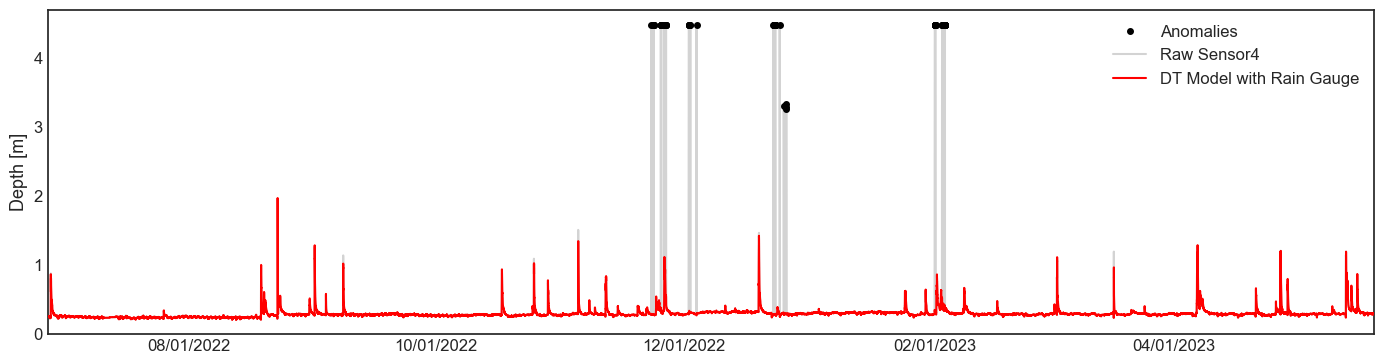

In [16]:

plt.rcParams.update({'font.size': 12})
start = datetime(2022, 6, 27, tzinfo=timezone('US/Central'))
end = datetime(2023, 5, 20, tzinfo=timezone('US/Central'))
plt.style.use('seaborn-v0_8-white')

plt.figure(figsize=(14, 3.8))
ax = plt.gca()
ax.set_xlim(start, end)
ax.set_ylim(0, 4.7)

ax.plot(Sensor[Sensor['class']==False]['Sensor4'],c='k', linestyle='None', zorder=4, marker='.', markersize=8, label='Anomalies')
ax.plot(Sensor['Sensor4'],c='lightgray',label='Raw Sensor4')
ax.plot(model_result_kf, 'r', label='DT Model with Rain Gauge', zorder=4)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.legend(fontsize=12)
ax.set_ylabel('Depth [m]', fontsize=13)
#ax.set_title('(c) Noise detection with kalman filter', fontsize=10, loc='left')
plt.tight_layout()
plt.show()

In [17]:
# Upload Sensor data
Sensor = pd.read_csv('../data/sensor_measurements/Sensor4_classification.csv', index_col=0)
Sensor.index = pd.to_datetime(Sensor.index)

model_result_kf = pd.read_csv('../result/digital_twin_model_result/h_j_kf_h4_gauge.csv', index_col=[0], converters={'0': pd.to_datetime})


In [18]:

model_result_kf.index = pd.to_datetime(model_result_kf.index)

# Resample and interpolate simulation data
model_result_kf_resample = model_result_kf.resample('5min').mean().interpolate(method='nearest')


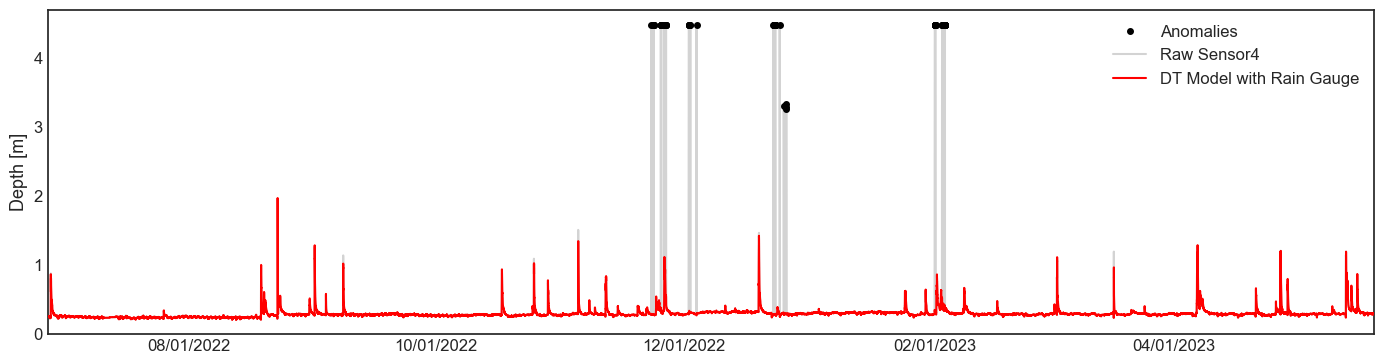

In [19]:
plt.rcParams.update({'font.size': 12})
start = datetime(2022, 6, 27, tzinfo=timezone('US/Central'))
end = datetime(2023, 5, 20, tzinfo=timezone('US/Central'))
plt.style.use('seaborn-v0_8-white')

plt.figure(figsize=(14, 3.8))
ax = plt.gca()
ax.set_xlim(start, end)
ax.set_ylim(0, 4.7)

ax.plot(Sensor[Sensor['class']==False]['Sensor4'],c='k', linestyle='None', zorder=4, marker='.', markersize=8, label='Anomalies')
ax.plot(Sensor['Sensor4'],c='lightgray',label='Raw Sensor4')
ax.plot(model_result_kf, 'r', label='DT Model with Rain Gauge', zorder=4)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.legend(fontsize=12)
ax.set_ylabel('Depth [m]', fontsize=13)
#ax.set_title('(c) Noise detection with kalman filter', fontsize=10, loc='left')
plt.tight_layout()
plt.show()

# Raw Sensor Data 

In [20]:
Sensor1 = pd.read_csv('../data/sensor_measurements/Sensor1_classification.csv', index_col=0)
Sensor1.index = pd.to_datetime(Sensor1.index)
Sensor2 = pd.read_csv('../data/sensor_measurements/Sensor2_classification.csv', index_col=0)
Sensor2.index = pd.to_datetime(Sensor2.index)
Sensor3 = pd.read_csv('../data/sensor_measurements/Sensor3_classification.csv', index_col=0)
Sensor3.index = pd.to_datetime(Sensor3.index)
Sensor4 = pd.read_csv('../data/sensor_measurements/Sensor4_classification.csv', index_col=0)
Sensor4.index = pd.to_datetime(Sensor4.index)


In [21]:
# upload LCRA data (Flow, depth, and precipitation data for the 'Waller Creek at 23rd Street' gage from the LCRA site.)
LCRA_2022= pd.read_excel('../data/LCRA_Export/LCRA_Export_2022.xlsx')[8:]
LCRA_2023= pd.read_excel('../data/LCRA_Export/LCRA_Export_2023.xlsx')[8:]
LCRA=pd.concat([LCRA_2022[8:],LCRA_2023[8:]])
LCRA = LCRA.set_index('Site Name')
LCRA.index.name = 'Time'

# Handle timezone
LCRA = LCRA.tz_localize('US/Central', nonexistent='shift_forward').tz_convert('UTC')

# Rename columns to be more descriptive
LCRA = LCRA.rename(columns={'W3A' : 'depth__ft', 'W3A.1' : 'flow_rate__cfs', 'W3A.3' : 'precip_tot__in'})
LCRA = LCRA.drop('W3A.2', axis=1)

# Compute dt for each time bin
LCRA['dt__s'] = np.roll(pd.Series(LCRA.index).diff(1).dt.seconds.values, -1)
LCRA['dt__s'] = LCRA['dt__s'].fillna(method='ffill')
LCRA=LCRA[LCRA['dt__s']!=0]

# Compute precipitation rate from total inches and dt
LCRA['precip_rate__in_per_s'] = LCRA['precip_tot__in'] / LCRA['dt__s']
# Compute inches of precipitation for desired sample interval
sample_interval = 30
precip__in = sample_interval * LCRA['precip_rate__in_per_s'].astype(np.float64).resample(f'{sample_interval}s').mean().interpolate()
 

/Users/future_water_system/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/var/folders/0z/96nhv68546j11lkz0bh80tqw0000gp/T/ipykernel_95001/209059065.py:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  LCRA['dt__s'] = LCRA['dt__s'].fillna(method='ffill')


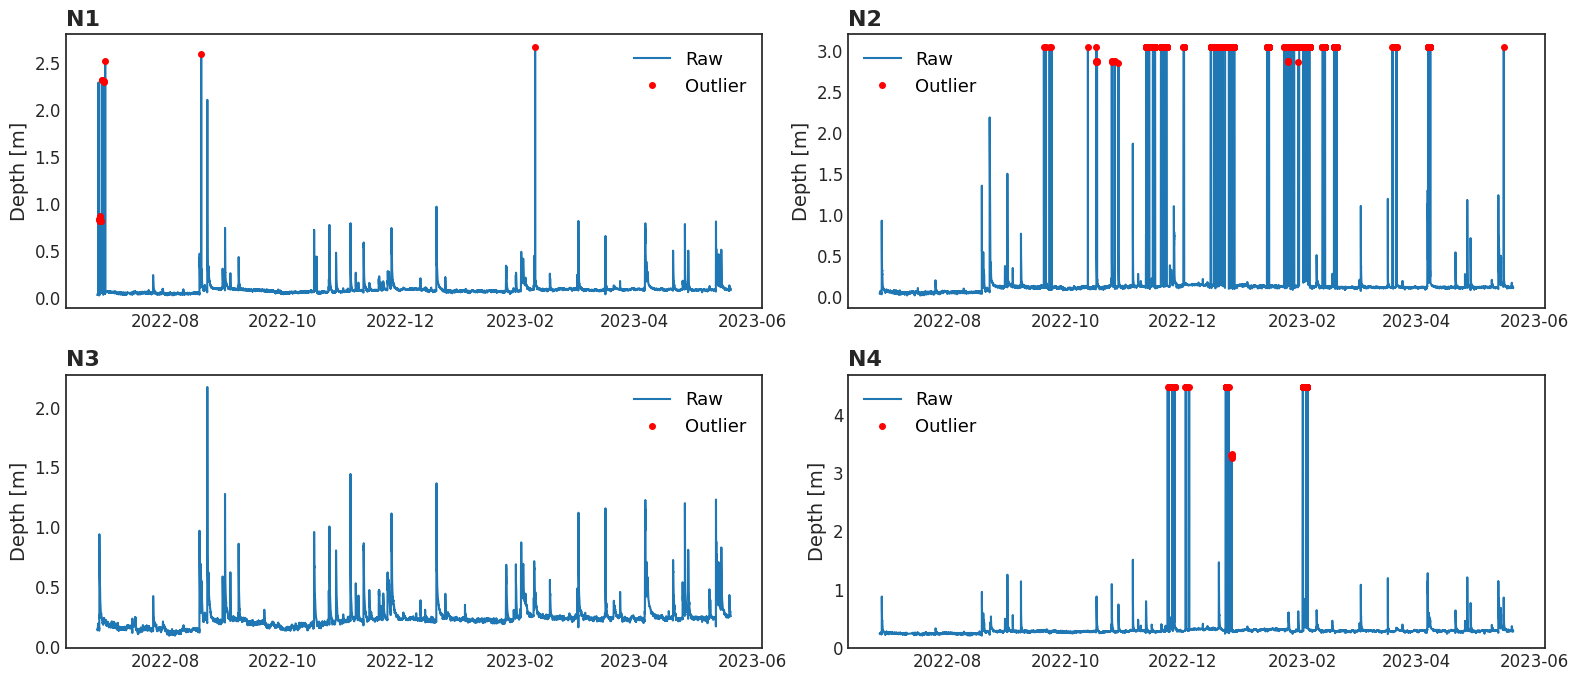

In [22]:

fig, ax = plt.subplots(2, 2, figsize=(16, 7))
plt.style.use("default")
plt.rcParams.update({'font.size': 13})
ax[0,0].plot(Sensor1['20220627':'20230520']['Sensor1'], label='Raw')
ax[0,0].plot(Sensor1['20220627':'20230520'][Sensor1['class']==False]['Sensor1'],'.',c='r', label='Outlier',markersize=8)
ax[0,0].set_title('N1',fontsize=16,fontweight='bold',loc='left')
ax[0,0].set_ylabel('Depth [m]', fontsize=14)
ax[0,0].legend(loc='upper right', frameon=False)
ax[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax[0,0].xaxis.set_major_locator(mdates.MonthLocator(interval=2))

ax[0,1].plot(Sensor2['20220627':'20230520']['Sensor2'], label='Raw')
ax[0,1].plot(Sensor2['20220627':'20230520'][Sensor2['class']==False]['Sensor2'],'.',c='r', label='Outlier',markersize=8)
# ax[0,1].get_xaxis().set_visible(False)
ax[0,1].set_title('N2',fontsize=16,fontweight='bold',loc='left')
ax[0,1].set_ylabel('Depth [m]', fontsize=14)
ax[0,1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax[0,1].xaxis.set_major_locator(mdates.MonthLocator(interval=2))

ax[0,1].legend(loc='upper left',frameon=False)

ax[1,0].plot(Sensor3['20220627':'20230520']['Sensor3'], label='Raw')
ax[1,0].plot(Sensor3['20220627':'20230520'][Sensor3['class']==False]['Sensor3'],'.',c='r', label='Outlier',markersize=8)
ax[1,0].set_ylabel('Depth [m]', fontsize=14)
ax[1,0].set_title('N3',fontsize=16,fontweight='bold',loc='left')
ax[1,0].legend(frameon=False)
ax[1,0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax[1,0].xaxis.set_major_locator(mdates.MonthLocator(interval=2))

ax[1,1].plot(Sensor4['20220627':'20230520']['Sensor4'], label='Raw')
ax[1,1].plot(Sensor4['20220627':'20230520'][Sensor4['class']==False]['Sensor4'],'.',c='r', label='Outlier',markersize=8)
ax[1,1].set_ylabel('Depth [m]', fontsize=14)
ax[1,1].legend(loc='upper left',frameon=False)
ax[1,1].set_title('N4',fontsize=16,fontweight='bold',loc='left')
ax[1,1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax[1,1].xaxis.set_major_locator(mdates.MonthLocator(interval=2))

plt.tight_layout()


# KGE Value 

## Sensor 4 (Main Manuscript) 

In [23]:
def load_data(sensor_file, forecast_file, gauge_file,kf_gauge_file,kf_forecast_file, data_sensor):
    sensor_raw = pd.read_csv(sensor_file, index_col=[0], converters={'0': pd.to_datetime})
    sensor = sensor_raw.loc[sensor_raw['class'], data_sensor]
    sensor_outlier = sensor_raw.loc[~sensor_raw['class'], data_sensor]
    sensor.index = pd.to_datetime(sensor.index)
    
    forecast_model_result_kf = pd.read_csv(kf_forecast_file, index_col=[0], converters={'0': pd.to_datetime})
    forecast_model_result_kf.index = pd.to_datetime(forecast_model_result_kf.index)
    
    gauge_model_result_kf = pd.read_csv(kf_gauge_file, index_col=[0], converters={'0': pd.to_datetime})
    gauge_model_result_kf.index = pd.to_datetime(gauge_model_result_kf.index)
    
    forecast_model_result_all = pd.read_csv(forecast_file, index_col=[0], converters={'0': pd.to_datetime})
    forecast_model_result_all.index = pd.to_datetime(forecast_model_result_all.index)
    
    gauge_model_result_all =pd.read_csv(gauge_file, index_col=[0], converters={'0': pd.to_datetime})
    gauge_model_result_all.index = pd.to_datetime(gauge_model_result_all.index)
    
    
    return sensor, forecast_model_result_kf, gauge_model_result_kf, forecast_model_result_all, gauge_model_result_all

def resample_and_interpolate(data):
    return data.resample('1min').mean().interpolate(method='nearest')

def merge_data(sensor, forecast_model_result, gauge_model_result, start_date, end_date):
    merged_data_forecast = pd.merge_asof(sensor.loc[start_date:end_date], forecast_model_result, left_index=True, right_index=True, direction='nearest')
    merged_data_gauge = pd.merge_asof(sensor.loc[start_date:end_date], gauge_model_result, left_index=True, right_index=True, direction='nearest')
    return merged_data_forecast, merged_data_gauge

def evaluate_kge(data,sensor_loc,junction):
    kge, _, _, _ = he.evaluator(he.kge, data[sensor_loc], data[junction])
    return kge[0]
def plot_data(ax, resampled_data, kge, true_values, sensor_loc,junction,alphabet_number, color):
    ax.scatter(resampled_data[junction], resampled_data[sensor_loc], s=2, color=color)
    ax.plot([true_values.min(), true_values.max()], [true_values.min(), true_values.max()], 'k--', lw=1, alpha=0.7)
    ax.set_ylim(0, 1.5)
    ax.set_xlim(0, 1.5)
    ax.set_yticks([0, 0.5, 1, 1.5])
    ax.set_xticks([0, 0.5, 1, 1.5])
    ax.text(0.055, 1.37, f'({alphabet_number})', fontsize=11, fontweight='bold')
    ax.text(0.9, 0.1, f'KGE = {kge:.4f}', color='k', fontsize=10)
    ax.set_xlabel('Simulated depth [m]')
    ax.set_ylabel('Observed depth [m]')



In [24]:
plt.rcParams.update({'font.size': 10})
sensor_file = '../data/sensor_measurements/Sensor4_classification.csv'
forecast_file = '../result/base_model_result/h_j_h4_forecast.csv'
gauge_file = '../result/base_model_result/h_j_h4_gauge.csv'
kf_forecast_file='../result/digital_twin_model_result/h_j_kf_h4_forecast_holdout.csv'
kf_gauge_file='../result/digital_twin_model_result/h_j_kf_h4_gauge_holdout.csv'

Sensor_loc='Sensor4'
junction='J_WLR20_TRINITY'

sensor, forecast_model_result_kf, gauge_model_result_kf, forecast_model_result_all, gauge_model_result_all = load_data(sensor_file, forecast_file, gauge_file,kf_gauge_file,kf_forecast_file,Sensor_loc)

sensor_resampled = resample_and_interpolate(sensor)
forecast_model_result_kf_resampled = resample_and_interpolate(forecast_model_result_kf)
gauge_model_result_kf_resampled = resample_and_interpolate(gauge_model_result_kf)
forecast_model_result_all_resampled = resample_and_interpolate(forecast_model_result_all)
gauge_model_result_all_resampled = resample_and_interpolate(gauge_model_result_all)

start_date = '2023-03-25'
end_date = '2023-05-20'

merged_data_forecast_all, merged_data_gauge_all = merge_data(sensor, forecast_model_result_all, gauge_model_result_all, start_date, end_date)
merged_data_forecast_kf, merged_data_gauge_kf = merge_data(sensor, forecast_model_result_kf, gauge_model_result_kf, start_date, end_date)

resampled_data_forecast_all = merged_data_forecast_all.resample('T').mean().dropna()
resampled_data_gauge_all = merged_data_gauge_all.resample('T').mean().dropna()
resampled_data_forecast_kf = merged_data_forecast_kf.resample('T').mean().dropna()
resampled_data_gauge_kf = merged_data_gauge_kf.resample('T').mean().dropna()


/var/folders/0z/96nhv68546j11lkz0bh80tqw0000gp/T/ipykernel_95001/3381822795.py:25: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_data_forecast_all = merged_data_forecast_all.resample('T').mean().dropna()
/var/folders/0z/96nhv68546j11lkz0bh80tqw0000gp/T/ipykernel_95001/3381822795.py:26: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_data_gauge_all = merged_data_gauge_all.resample('T').mean().dropna()
/var/folders/0z/96nhv68546j11lkz0bh80tqw0000gp/T/ipykernel_95001/3381822795.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_data_forecast_kf = merged_data_forecast_kf.resample('T').mean().dropna()
/var/folders/0z/96nhv68546j11lkz0bh80tqw0000gp/T/ipykernel_95001/3381822795.py:28: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_dat

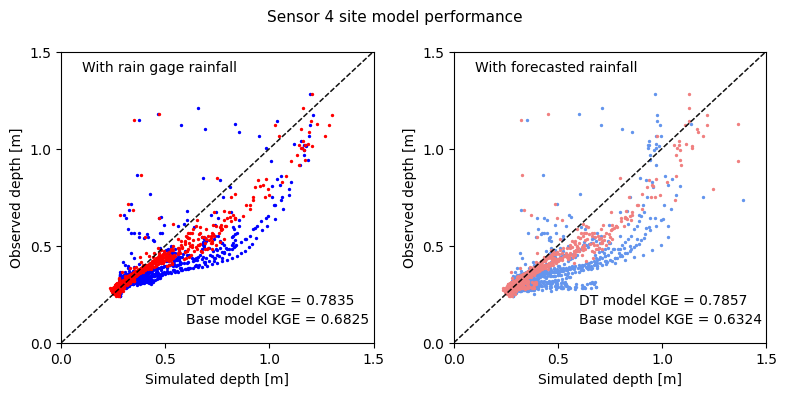

In [25]:

y_true = np.array([0, 1.5])
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

kge0 = evaluate_kge(resampled_data_gauge_all, Sensor_loc, junction)
kge1 = evaluate_kge(resampled_data_forecast_all, Sensor_loc, junction)
kge2 = evaluate_kge(resampled_data_gauge_kf, Sensor_loc, junction)
kge3 = evaluate_kge(resampled_data_forecast_kf, Sensor_loc, junction)


ax[0].scatter(resampled_data_gauge_all[junction], resampled_data_gauge_all[Sensor_loc], s=2,  color='b')
ax[0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=1, alpha=0.7)
ax[0].set_ylim(0, 1.5)
ax[0].set_xlim(0, 1.5)
ax[0].set_yticks([0, 0.5, 1, 1.5])
ax[0].set_xticks([0, 0.5, 1, 1.5])
ax[0].text(0.6, 0.1, f'Base model KGE = {kge0:.4f}', color='k', fontsize=10)
ax[0].set_xlabel('Simulated depth [m]')
ax[0].set_ylabel('Observed depth [m]')
    
ax[0].scatter(resampled_data_gauge_kf[junction], resampled_data_gauge_kf[Sensor_loc], s=2,  color='r')
ax[0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=1, alpha=0.7)
ax[0].set_ylim(0, 1.5)
ax[0].set_xlim(0, 1.5)
ax[0].set_yticks([0, 0.5, 1, 1.5])
ax[0].set_xticks([0, 0.5, 1, 1.5])
ax[0].text(0.6, 0.2, f'DT model KGE = {kge2:.4f}', color='k', fontsize=10)
ax[0].text(0.1, 1.4, 'With rain gage rainfall', color='k', fontsize=10)


ax[1].scatter(resampled_data_forecast_all[junction], resampled_data_gauge_all[Sensor_loc], s=2,  color='cornflowerblue')
ax[1].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=1, alpha=0.7)
ax[1].set_ylim(0, 1.5)
ax[1].set_xlim(0, 1.5)
ax[1].set_yticks([0, 0.5, 1, 1.5])
ax[1].set_xticks([0, 0.5, 1, 1.5])
ax[1].text(0.6, 0.1, f'Base model KGE = {kge1:.4f}', color='k', fontsize=10)
ax[1].set_xlabel('Simulated depth [m]')
ax[1].set_ylabel('Observed depth [m]')
    
ax[1].scatter(resampled_data_forecast_kf[junction], resampled_data_gauge_kf[Sensor_loc], s=2,  color='lightcoral')
ax[1].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=1, alpha=0.7)
ax[1].set_ylim(0, 1.5)
ax[1].set_xlim(0, 1.5)
ax[1].set_yticks([0, 0.5, 1, 1.5])
ax[1].set_xticks([0, 0.5, 1, 1.5])
ax[1].text(0.6, 0.2, f'DT model KGE = {kge3:.4f}', color='k', fontsize=10)
ax[1].text(0.1, 1.4, 'With forecasted rainfall', color='k', fontsize=10)

# Title for the entire figure
fig.suptitle('Sensor 4 site model performance', fontsize=11)

plt.tight_layout()
plt.show()


## Sensor 3

In [26]:
sensor_file = '../data/sensor_measurements/Sensor3_classification.csv'
forecast_file = '../result/base_model_result/h_j_h3_forecast.csv'
gauge_file = '../result/base_model_result/h_j_h3_gauge.csv'
kf_forecast_file='../result/digital_twin_model_result/h_j_kf_h3_forecast_holdout.csv'
kf_gauge_file='../result/digital_twin_model_result/h_j_kf_h3_gauge_holdout.csv'

Sensor_loc='Sensor3'
junction='J_WLR19_23RD'

sensor, forecast_model_result_kf, gauge_model_result_kf, forecast_model_result_all, gauge_model_result_all = load_data(sensor_file, forecast_file, gauge_file,kf_gauge_file,kf_forecast_file,Sensor_loc)

sensor_resampled = resample_and_interpolate(sensor)
forecast_model_result_kf_resampled = resample_and_interpolate(forecast_model_result_kf)
gauge_model_result_kf_resampled = resample_and_interpolate(gauge_model_result_kf)
forecast_model_result_all_resampled = resample_and_interpolate(forecast_model_result_all)
gauge_model_result_all_resampled = resample_and_interpolate(gauge_model_result_all)

start_date = '2023-03-25'
end_date = '2023-05-20'

merged_data_forecast_all, merged_data_gauge_all = merge_data(sensor, forecast_model_result_all, gauge_model_result_all, start_date, end_date)
merged_data_forecast_kf, merged_data_gauge_kf = merge_data(sensor, forecast_model_result_kf, gauge_model_result_kf, start_date, end_date)

resampled_data_forecast_all = merged_data_forecast_all.resample('T').mean().dropna()
resampled_data_gauge_all = merged_data_gauge_all.resample('T').mean().dropna()
resampled_data_forecast_kf = merged_data_forecast_kf.resample('T').mean().dropna()
resampled_data_gauge_kf = merged_data_gauge_kf.resample('T').mean().dropna()



/var/folders/0z/96nhv68546j11lkz0bh80tqw0000gp/T/ipykernel_95001/2935616857.py:24: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_data_forecast_all = merged_data_forecast_all.resample('T').mean().dropna()
/var/folders/0z/96nhv68546j11lkz0bh80tqw0000gp/T/ipykernel_95001/2935616857.py:25: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_data_gauge_all = merged_data_gauge_all.resample('T').mean().dropna()
/var/folders/0z/96nhv68546j11lkz0bh80tqw0000gp/T/ipykernel_95001/2935616857.py:26: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_data_forecast_kf = merged_data_forecast_kf.resample('T').mean().dropna()
/var/folders/0z/96nhv68546j11lkz0bh80tqw0000gp/T/ipykernel_95001/2935616857.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_dat

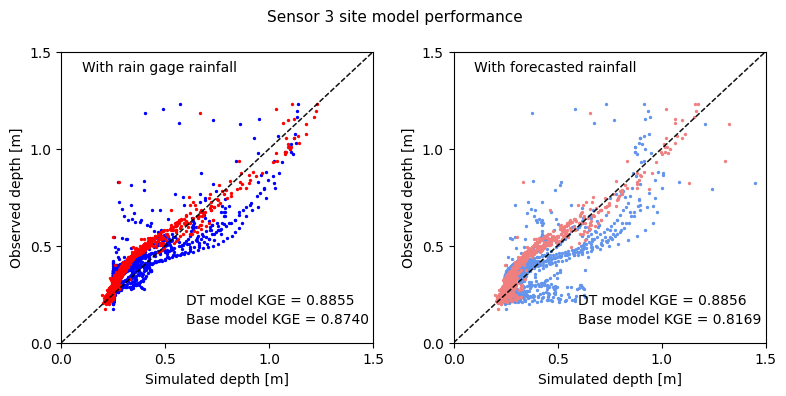

In [27]:

y_true = np.array([0, 1.5])
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

kge0 = evaluate_kge(resampled_data_gauge_all, Sensor_loc, junction)
kge1 = evaluate_kge(resampled_data_forecast_all, Sensor_loc, junction)
kge2 = evaluate_kge(resampled_data_gauge_kf, Sensor_loc, junction)
kge3 = evaluate_kge(resampled_data_forecast_kf, Sensor_loc, junction)


ax[0].scatter(resampled_data_gauge_all[junction], resampled_data_gauge_all[Sensor_loc], s=2,  color='b')
ax[0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=1, alpha=0.7)
ax[0].set_ylim(0, 1.5)
ax[0].set_xlim(0, 1.5)
ax[0].set_yticks([0, 0.5, 1, 1.5])
ax[0].set_xticks([0, 0.5, 1, 1.5])
ax[0].text(0.6, 0.1, f'Base model KGE = {kge0:.4f}', color='k', fontsize=10)
ax[0].set_xlabel('Simulated depth [m]')
ax[0].set_ylabel('Observed depth [m]')
    
ax[0].scatter(resampled_data_gauge_kf[junction], resampled_data_gauge_kf[Sensor_loc], s=2,  color='r')
ax[0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=1, alpha=0.7)
ax[0].set_ylim(0, 1.5)
ax[0].set_xlim(0, 1.5)
ax[0].set_yticks([0, 0.5, 1, 1.5])
ax[0].set_xticks([0, 0.5, 1, 1.5])
ax[0].text(0.6, 0.2, f'DT model KGE = {kge2:.4f}', color='k', fontsize=10)
ax[0].text(0.1, 1.4, 'With rain gage rainfall', color='k', fontsize=10)


ax[1].scatter(resampled_data_forecast_all[junction], resampled_data_gauge_all[Sensor_loc], s=2,  color='cornflowerblue')
ax[1].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=1, alpha=0.7)
ax[1].set_ylim(0, 1.5)
ax[1].set_xlim(0, 1.5)
ax[1].set_yticks([0, 0.5, 1, 1.5])
ax[1].set_xticks([0, 0.5, 1, 1.5])
ax[1].text(0.6, 0.1, f'Base model KGE = {kge1:.4f}', color='k', fontsize=10)
ax[1].set_xlabel('Simulated depth [m]')
ax[1].set_ylabel('Observed depth [m]')
    
ax[1].scatter(resampled_data_forecast_kf[junction], resampled_data_gauge_kf[Sensor_loc], s=2,  color='lightcoral')
ax[1].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=1, alpha=0.7)
ax[1].set_ylim(0, 1.5)
ax[1].set_xlim(0, 1.5)
ax[1].set_yticks([0, 0.5, 1, 1.5])
ax[1].set_xticks([0, 0.5, 1, 1.5])
ax[1].text(0.6, 0.2, f'DT model KGE = {kge3:.4f}', color='k', fontsize=10)
ax[1].text(0.1, 1.4, 'With forecasted rainfall', color='k', fontsize=10)

# Title for the entire figure
fig.suptitle('Sensor 3 site model performance', fontsize=11)

plt.tight_layout()
plt.show()


# Real Time Simulation

In [28]:
inch_to_mm=25.4
ft_to_meter=0.305



In [29]:
# Add LCRA data (Flow, depth, and precipitation data for the 'Waller Creek at 23rd Street' gage from the LCRA site.)
LCRA= pd.read_excel('../data/LCRA_Export/LCRA_Export_2023.xlsx')[8:]
LCRA = LCRA.set_index('Site Name')
LCRA.index.name = 'Time'
# Handle timezone
LCRA = LCRA.tz_localize('US/Central', nonexistent='shift_forward').tz_convert('UTC')
# Rename columns to be more descriptive
LCRA = LCRA.rename(columns={'W3A' : 'depth__ft', 'W3A.1' : 'flow_rate__cfs', 'W3A.3' : 'precip_tot__in'})
LCRA = LCRA.drop('W3A.2', axis=1)

# LCRA depth and discharge flow monitoring data 
lcra_depth=LCRA['depth__ft']*ft_to_meter
lcra_flow_cfs=LCRA['flow_rate__cfs']
lcra_flow=lcra_flow_cfs*ft_to_meter*ft_to_meter*ft_to_meter

#Load Forecast precipitation 
forecast = pd.read_csv('../data/rainfall_data/precip__in_forecast.csv', index_col=0)
forecast.index = pd.to_datetime(pd.Series(forecast.index))
forecast = forecast.tz_localize('UTC')

/Users/future_water_system/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


In [30]:
#plot precipitation graph 

def gauge_precip_data(LCRA,sample_interval_h):
    # Compute dt for each time bin
    LCRA['dt__s'] = np.roll(pd.Series(LCRA.index).diff(1).dt.seconds.values, -1)
    # Compute precipitation rate from total inches and dt
    LCRA['precip_rate__in_per_s'] = LCRA['precip_tot__in'] / LCRA['dt__s']

    # Compute inches of precipitation for desired sample interval
    precip__mm = sample_interval_h*inch_to_mm*3600 * LCRA['precip_rate__in_per_s'].resample(f'{sample_interval_h}h').mean().interpolate()
   
    return precip__mm

def forecast_precip_data(forecast, sample_interval_h):
    # Compute inches of precipitation for desired sample interval
    forecast_precip__mm = sample_interval_h*inch_to_mm*60*60 * forecast['precip_rate__in_per_s'].resample(f'{sample_interval_h}h').mean().interpolate()
    return forecast_precip__mm



In [31]:
# Read and process data for 'model_gauge_depth'
model_gauge_depth = pd.read_csv('../result/base_model_result/h_j_h4_gauge.csv', index_col=[0])
model_gauge_depth.index = pd.to_datetime(model_gauge_depth.index)

# Read and process data for 'model_forecast_depth'
model_forecast_depth = pd.read_csv('../result/base_model_result/h_j_h4_forecast.csv', index_col=[0])
model_forecast_depth.index = pd.to_datetime(model_forecast_depth.index)


# Read and process data for 'model_forecast_depth'
DT_gauge_depth = pd.read_csv('../result/digital_twin_model_result/h_j_kf_h4_gauge_holdout.csv', index_col=[0])
DT_gauge_depth.index = pd.to_datetime(DT_gauge_depth.index)

# Read and process data for 'model_forecast_depth'
DT_forecast_depth = pd.read_csv('../result/digital_twin_model_result/h_j_kf_h4_forecast_holdout.csv', index_col=[0])
DT_forecast_depth.index = pd.to_datetime(DT_forecast_depth.index)


# Read and process data for 'sensor_3'
s = pd.read_csv('../data/sensor_measurements/Sensor4_classification.csv', index_col=[0], converters={'0': pd.to_datetime})
sensor = s.loc[s['class'], 'Sensor4']
sensor_outlier = s.loc[~s['class'], 'Sensor4']
sensor_all = s['Sensor4']
sensor.index = pd.to_datetime(sensor.index)
sensor_outlier.index = pd.to_datetime(sensor_outlier.index)
sensor_all.index = pd.to_datetime(sensor_all.index)

/var/folders/0z/96nhv68546j11lkz0bh80tqw0000gp/T/ipykernel_95001/3153395282.py:10: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  precip__mm = sample_interval_h*inch_to_mm*3600 * LCRA['precip_rate__in_per_s'].resample(f'{sample_interval_h}h').mean().interpolate()


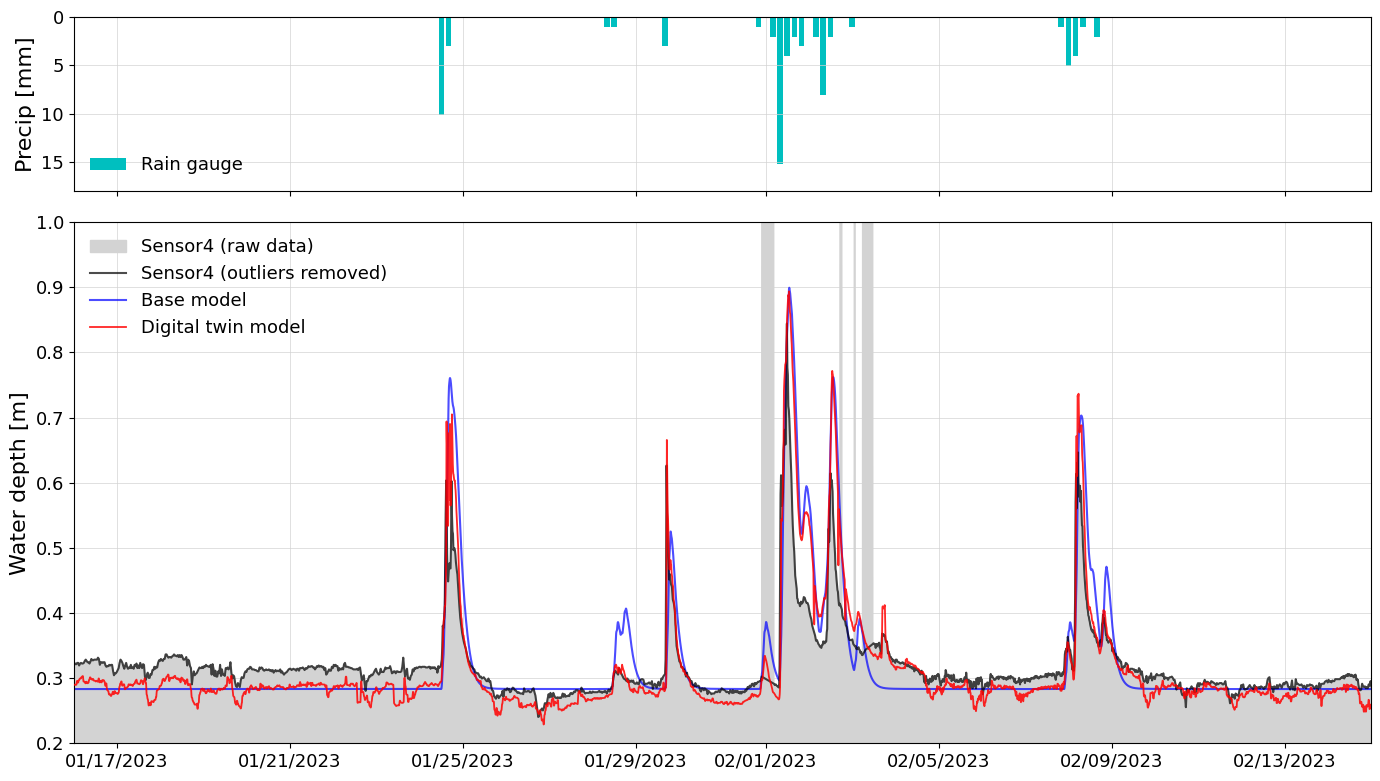

In [34]:

plt.style.use("default")
plt.rcParams.update({'font.size': 13})
# Define start and end dates
start_date = datetime(2023, 1, 16, 0, 0, 0)
end_date = datetime(2023, 2, 15, 0, 0, 0)

# Create subplots
fig, ax = plt.subplots(2, figsize=(14 ,8), gridspec_kw={'height_ratios': [2,6]})

# Plot precipitation data
sample_interval_h=4
forecast_precip__mm=forecast_precip_data(forecast,sample_interval_h)
precip__mm = gauge_precip_data(LCRA,sample_interval_h)

ax[0].bar(precip__mm.index, precip__mm, width=0.13, color='c', label='Rain gauge')
ax[0].legend( loc='lower left', frameon=False)
ax[0].set_ylabel('Precip [mm]', fontsize=16)
ax[0].grid(True, color='lightgray', linestyle='-', linewidth=0.5)

ax[0].set_xticklabels([])# Hide x-axis labels for the first subplot
ax[0].set_ylim(0, 18)
ax[0].invert_yaxis()

# Plot depth data
ax[1].set_ylim(0.2, 1.0)
ax[1].fill_between(sensor_all.index,sensor_all,   color='lightgray',zorder=1 ,label='Sensor4 (raw data)')
ax[1].plot(sensor, label='Sensor4 (outliers removed)', color='k',zorder=3,linewidth=1.5,alpha=0.7)
ax[1].plot(model_gauge_depth, label='Base model', color='blue',zorder=2,linewidth=1.5,alpha=0.7)
ax[1].plot(DT_gauge_depth, label='Digital twin model', color='red',zorder=3,linewidth=1.3,alpha=0.85)

ax[1].set_ylabel('Water depth [m]', fontsize=16)
ax[1].legend(loc='upper left', frameon=False)
ax[1].grid(True, color='lightgray', linestyle='-', linewidth=0.5)

# Plot discharge data

ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
# Set the x-axis limits for all subplots
ax[0].set_xlim(start_date, end_date)
ax[1].set_xlim(start_date, end_date)


plt.tight_layout()

plt.show()